In [1]:
import os
import json
import string
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing.evaluate_sparsity_regimes import missing_patterns, synthesize_and_plot_results

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


In [3]:
def plot_dist(data: pd.DataFrame, data_missing: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('missing')
    sns.scatterplot(x='x', y='y', data=data, ax=ax1, color=sns.color_palette()[0])
    sns.scatterplot(x='x', y='y', data=data_missing, ax=ax2, color=sns.color_palette()[1])
    plt.show()
    
def plot_heatmap(data1: pd.DataFrame, data2: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('synth')
    
    crosstab1 = pd.crosstab(data1['x'], columns=[data1['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab1, vmin=0.0, vmax=1.0, ax=ax1)
    
    crosstab2 = pd.crosstab(data2['x'], columns=[data2['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab2, vmin=0.0, vmax=1.0, ax=ax2)
            

============= MCAR =============
Prop. NaNs:
x    0.4960
y    0.4946
dtype: float64


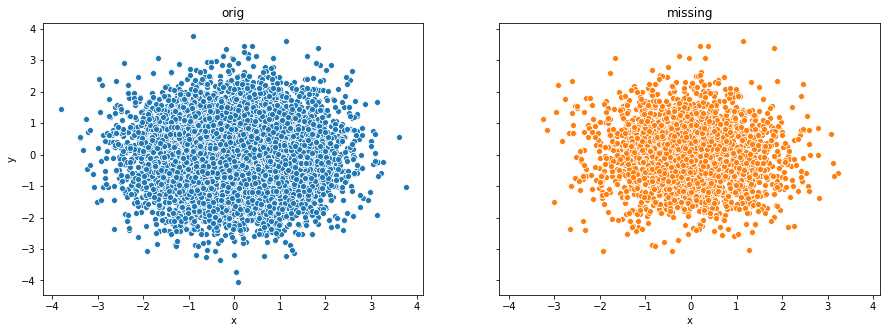

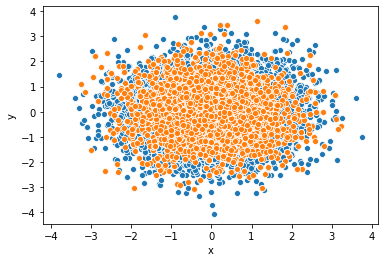

============= MAR =============
Prop. NaNs:
x    0.5001
y    0.5002
dtype: float64


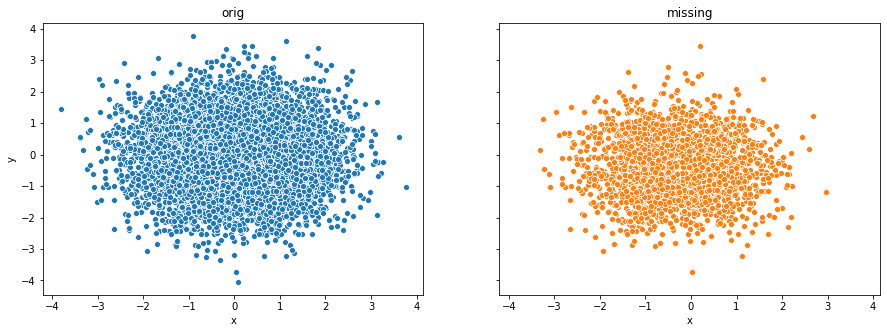

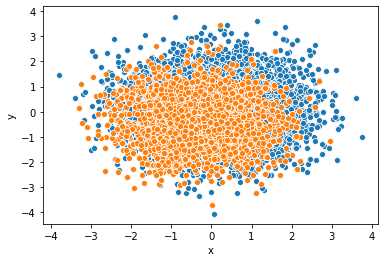

============= MNAR =============
Prop. NaNs:
x    0.4999
y    0.5000
dtype: float64


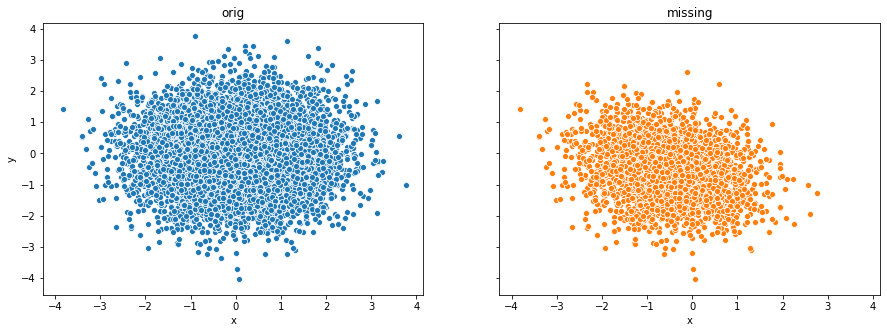

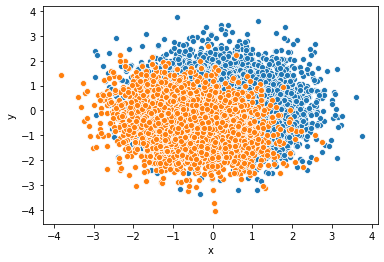

In [4]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)

keep_ratio = 0.5
std_noise = 2.

# MCAR
print('============= MCAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MCAR')

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MAR
print('============= MAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MNAR
print('============= MNAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MNAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()

In [5]:
from synthesized.testing import UtilityTesting
from synthesized import HighDimSynthesizer

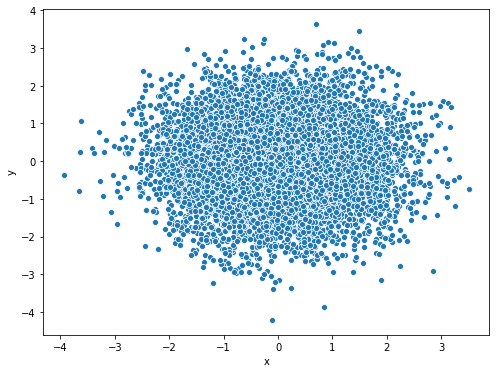

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Computed results for 75% NaNs for MCAR. Took 220.19s.
Computed results for 70% NaNs for MCAR. Took 237.61s.
Computed results for 65% NaNs for MCAR. Took 222.77s.
Computed results for 60% NaNs for MCAR. Took 209.58s.
Computed results for 55% NaNs for MCAR. Took 210.33s.
Computed results for 50% NaNs for MCAR. Took 222.20s.
Computed results for 45% NaNs for MCAR. Took 240.77s.
Computed results for 40% NaNs for MCAR. Took 212.88s.
Computed results for 35% NaNs for MCAR. Took 218.37s.
Computed results for 30% NaNs for MCAR. Took 209.08s.
Computed results for 25% NaNs for MCAR. Took 209.53s.
Computed results for 20% NaNs for MCAR. Took 215.31s.
Computed results for 15% NaNs for MCAR. Took 214.01s.
Computed results for 10% NaNs for MCAR. Took 221.79s.
Computed results for 5% NaNs for MCAR. Took 219.27s.
Computed results for 0% NaNs for MCAR. Took 190.50s.


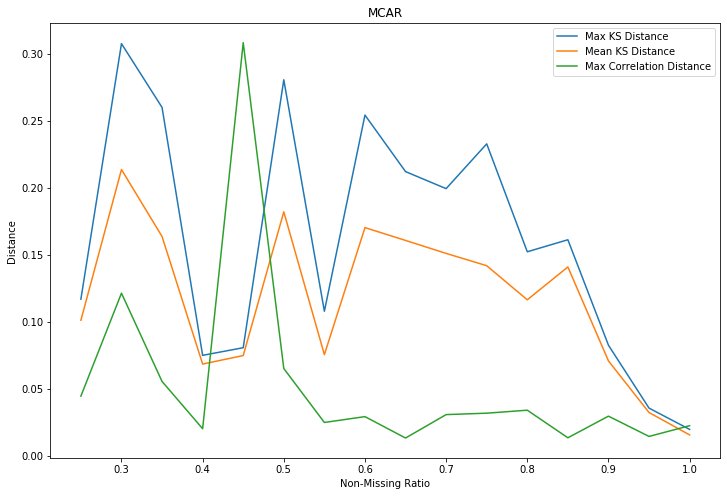

Computed results for 75% NaNs for MAR. Took 216.52s.
Computed results for 70% NaNs for MAR. Took 215.38s.
Computed results for 65% NaNs for MAR. Took 238.50s.
Computed results for 60% NaNs for MAR. Took 222.61s.
Computed results for 55% NaNs for MAR. Took 239.64s.
Computed results for 50% NaNs for MAR. Took 224.06s.
Computed results for 45% NaNs for MAR. Took 230.77s.
Computed results for 40% NaNs for MAR. Took 215.60s.
Computed results for 35% NaNs for MAR. Took 231.53s.
Computed results for 30% NaNs for MAR. Took 241.25s.
Computed results for 25% NaNs for MAR. Took 236.18s.
Computed results for 20% NaNs for MAR. Took 227.15s.
Computed results for 15% NaNs for MAR. Took 226.00s.
Computed results for 10% NaNs for MAR. Took 234.31s.
Computed results for 5% NaNs for MAR. Took 234.50s.
Computed results for 0% NaNs for MAR. Took 200.26s.


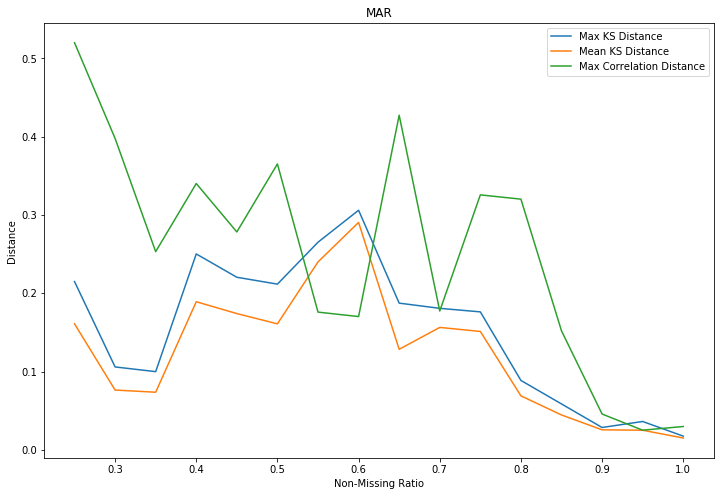

Computed results for 75% NaNs for MNAR. Took 202.11s.
Computed results for 70% NaNs for MNAR. Took 255.68s.
Computed results for 65% NaNs for MNAR. Took 241.54s.
Computed results for 60% NaNs for MNAR. Took 250.77s.
Computed results for 55% NaNs for MNAR. Took 220.53s.
Computed results for 50% NaNs for MNAR. Took 277.27s.
Computed results for 45% NaNs for MNAR. Took 248.39s.
Computed results for 40% NaNs for MNAR. Took 238.79s.
Computed results for 35% NaNs for MNAR. Took 210.73s.
Computed results for 30% NaNs for MNAR. Took 3512.13s.
Computed results for 25% NaNs for MNAR. Took 240.08s.
Computed results for 20% NaNs for MNAR. Took 54380.40s.
Computed results for 15% NaNs for MNAR. Took 222.29s.
Computed results for 10% NaNs for MNAR. Took 167876.60s.
Computed results for 5% NaNs for MNAR. Took 221.28s.
Computed results for 0% NaNs for MNAR. Took 196.69s.


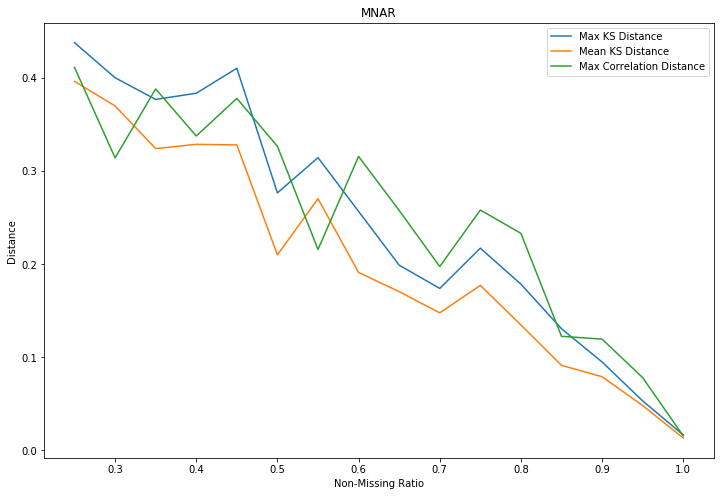

In [6]:
data = syn_dist.create_gauss_ball(x_mean=0, x_std=1, y_mean=0, y_std=1, size=10000)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=data)
plt.show()

results = dict()
for mechanism in ['MCAR', 'MAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=10000, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )
